# Problem

Each character on a computer is assigned a unique code and the preferred standard is ASCII (American Standard Code for Information Interchange). For example, uppercase A = 65, asterisk (*) = 42, and lowercase k = 107.

A modern encryption method is to take a text file, convert the bytes to ASCII, then XOR each byte with a given value, taken from a secret key. The advantage with the XOR function is that using the same encryption key on the cipher text, restores the plain text; for example, 65 XOR 42 = 107, then 107 XOR 42 = 65.

For unbreakable encryption, the key is the same length as the plain text message, and the key is made up of random bytes. The user would keep the encrypted message and the encryption key in different locations, and without both "halves", it is impossible to decrypt the message.

Unfortunately, this method is impractical for most users, so the modified method is to use a password as a key. If the password is shorter than the message, which is likely, the key is repeated cyclically throughout the message. The balance for this method is using a sufficiently long password key for security, but short enough to be memorable.

Your task has been made easy, as the encryption key consists of three lower case characters. Using cipher.txt (right click and 'Save Link/Target As...'), a file containing the encrypted ASCII codes, and the knowledge that the plain text must contain common English words, decrypt the message and find the sum of the ASCII values in the original text.


In [1]:
cipher = [79,59,12,2,79,35,8,28,20,2,3,68,8,9,68,45,0,12,9,67,68,4,7,5,23,27,1,21,79,85,78,79,85,71,38,10,71,27,12,2,79,6,2,8,13,9,1,13,9,8,68,19,7,1,71,56,11,21,11,68,6,3,22,2,14,0,30,79,1,31,6,23,19,10,0,73,79,44,2,79,19,6,28,68,16,6,16,15,79,35,8,11,72,71,14,10,3,79,12,2,79,19,6,28,68,32,0,0,73,79,86,71,39,1,71,24,5,20,79,13,9,79,16,15,10,68,5,10,3,14,1,10,14,1,3,71,24,13,19,7,68,32,0,0,73,79,87,71,39,1,71,12,22,2,14,16,2,11,68,2,25,1,21,22,16,15,6,10,0,79,16,15,10,22,2,79,13,20,65,68,41,0,16,15,6,10,0,79,1,31,6,23,19,28,68,19,7,5,19,79,12,2,79,0,14,11,10,64,27,68,10,14,15,2,65,68,83,79,40,14,9,1,71,6,16,20,10,8,1,79,19,6,28,68,14,1,68,15,6,9,75,79,5,9,11,68,19,7,13,20,79,8,14,9,1,71,8,13,17,10,23,71,3,13,0,7,16,71,27,11,71,10,18,2,29,29,8,1,1,73,79,81,71,59,12,2,79,8,14,8,12,19,79,23,15,6,10,2,28,68,19,7,22,8,26,3,15,79,16,15,10,68,3,14,22,12,1,1,20,28,72,71,14,10,3,79,16,15,10,68,3,14,22,12,1,1,20,28,68,4,14,10,71,1,1,17,10,22,71,10,28,19,6,10,0,26,13,20,7,68,14,27,74,71,89,68,32,0,0,71,28,1,9,27,68,45,0,12,9,79,16,15,10,68,37,14,20,19,6,23,19,79,83,71,27,11,71,27,1,11,3,68,2,25,1,21,22,11,9,10,68,6,13,11,18,27,68,19,7,1,71,3,13,0,7,16,71,28,11,71,27,12,6,27,68,2,25,1,21,22,11,9,10,68,10,6,3,15,27,68,5,10,8,14,10,18,2,79,6,2,12,5,18,28,1,71,0,2,71,7,13,20,79,16,2,28,16,14,2,11,9,22,74,71,87,68,45,0,12,9,79,12,14,2,23,2,3,2,71,24,5,20,79,10,8,27,68,19,7,1,71,3,13,0,7,16,92,79,12,2,79,19,6,28,68,8,1,8,30,79,5,71,24,13,19,1,1,20,28,68,19,0,68,19,7,1,71,3,13,0,7,16,73,79,93,71,59,12,2,79,11,9,10,68,16,7,11,71,6,23,71,27,12,2,79,16,21,26,1,71,3,13,0,7,16,75,79,19,15,0,68,0,6,18,2,28,68,11,6,3,15,27,68,19,0,68,2,25,1,21,22,11,9,10,72,71,24,5,20,79,3,8,6,10,0,79,16,8,79,7,8,2,1,71,6,10,19,0,68,19,7,1,71,24,11,21,3,0,73,79,85,87,79,38,18,27,68,6,3,16,15,0,17,0,7,68,19,7,1,71,24,11,21,3,0,71,24,5,20,79,9,6,11,1,71,27,12,21,0,17,0,7,68,15,6,9,75,79,16,15,10,68,16,0,22,11,11,68,3,6,0,9,72,16,71,29,1,4,0,3,9,6,30,2,79,12,14,2,68,16,7,1,9,79,12,2,79,7,6,2,1,73,79,85,86,79,33,17,10,10,71,6,10,71,7,13,20,79,11,16,1,68,11,14,10,3,79,5,9,11,68,6,2,11,9,8,68,15,6,23,71,0,19,9,79,20,2,0,20,11,10,72,71,7,1,71,24,5,20,79,10,8,27,68,6,12,7,2,31,16,2,11,74,71,94,86,71,45,17,19,79,16,8,79,5,11,3,68,16,7,11,71,13,1,11,6,1,17,10,0,71,7,13,10,79,5,9,11,68,6,12,7,2,31,16,2,11,68,15,6,9,75,79,12,2,79,3,6,25,1,71,27,12,2,79,22,14,8,12,19,79,16,8,79,6,2,12,11,10,10,68,4,7,13,11,11,22,2,1,68,8,9,68,32,0,0,73,79,85,84,79,48,15,10,29,71,14,22,2,79,22,2,13,11,21,1,69,71,59,12,14,28,68,14,28,68,9,0,16,71,14,68,23,7,29,20,6,7,6,3,68,5,6,22,19,7,68,21,10,23,18,3,16,14,1,3,71,9,22,8,2,68,15,26,9,6,1,68,23,14,23,20,6,11,9,79,11,21,79,20,11,14,10,75,79,16,15,6,23,71,29,1,5,6,22,19,7,68,4,0,9,2,28,68,1,29,11,10,79,35,8,11,74,86,91,68,52,0,68,19,7,1,71,56,11,21,11,68,5,10,7,6,2,1,71,7,17,10,14,10,71,14,10,3,79,8,14,25,1,3,79,12,2,29,1,71,0,10,71,10,5,21,27,12,71,14,9,8,1,3,71,26,23,73,79,44,2,79,19,6,28,68,1,26,8,11,79,11,1,79,17,9,9,5,14,3,13,9,8,68,11,0,18,2,79,5,9,11,68,1,14,13,19,7,2,18,3,10,2,28,23,73,79,37,9,11,68,16,10,68,15,14,18,2,79,23,2,10,10,71,7,13,20,79,3,11,0,22,30,67,68,19,7,1,71,8,8,8,29,29,71,0,2,71,27,12,2,79,11,9,3,29,71,60,11,9,79,11,1,79,16,15,10,68,33,14,16,15,10,22,73]

In [2]:
len(cipher)

1201

In [8]:
C1 = cipher[0::3]
C2 = cipher[1::3]
C3 = cipher[2::3]

In [10]:
def xor(C, value): return [c^value for c in C]

In [11]:
xor(C1, 98)

[45,
 96,
 106,
 96,
 106,
 79,
 107,
 102,
 117,
 119,
 44,
 37,
 37,
 96,
 96,
 107,
 107,
 113,
 37,
 119,
 100,
 96,
 124,
 125,
 113,
 43,
 96,
 100,
 114,
 109,
 106,
 37,
 97,
 96,
 100,
 66,
 43,
 37,
 37,
 118,
 107,
 109,
 103,
 108,
 108,
 37,
 113,
 66,
 43,
 37,
 37,
 96,
 96,
 96,
 119,
 109,
 98,
 109,
 96,
 118,
 75,
 109,
 98,
 125,
 113,
 113,
 113,
 96,
 108,
 34,
 104,
 96,
 49,
 108,
 37,
 118,
 99,
 100,
 108,
 109,
 41,
 107,
 113,
 118,
 108,
 37,
 115,
 37,
 98,
 37,
 37,
 96,
 106,
 43,
 37,
 96,
 108,
 113,
 109,
 96,
 113,
 106,
 109,
 109,
 97,
 110,
 118,
 37,
 97,
 109,
 97,
 110,
 118,
 102,
 37,
 115,
 37,
 113,
 98,
 118,
 108,
 37,
 66,
 37,
 107,
 79,
 107,
 109,
 71,
 113,
 113,
 37,
 37,
 105,
 96,
 119,
 107,
 100,
 112,
 113,
 37,
 98,
 37,
 37,
 100,
 96,
 119,
 107,
 104,
 109,
 103,
 108,
 96,
 96,
 112,
 37,
 37,
 118,
 96,
 108,
 107,
 37,
 79,
 107,
 108,
 96,
 37,
 118,
 106,
 113,
 37,
 98,
 62,
 96,
 100,
 106,
 124,
 37,
 113,
 118,
 11

In [14]:
def as_string(C): return ''.join([chr(c) for c in C])

In [15]:
as_string(xor(C1,98))

'-`j`jOkfuw,%%``kkq%wd`|}q+`drmj%a`dB+%%vkmgll%qB+%%```wmbm`vKmb}qqq`l"h`1l%vcdlm)kqvl%s%b%%`j+%`lqm`qjmmanv%amanvf%s%qbvl%B%kOkmGqq%%i`wkdpq%b%%d`wkhmgl``p%%v`lk%Okl`%vjq%b>`dj|%qvqq%b+%`kr%%`w%b)mb`imq`wk%vjbjj%qq%w+5pdmbq%w%vd%wbm)mriak%fk`lrk`d+4s%%vriakdkm%k`i%%vjd``%%qjir%is%hkd``m)`d%`lqj`hfi`jB+6m%``w%llk%uvdgqwpl%jmduvkwi)m%gqf`chj4Vq%wgd%h%ala`%%w%j%+`dcicklki`kcqp`+krm``%vi|q%j%%`k%kcmCm+'

In [23]:
import numpy
import pandas as pd

In [25]:
df = pd.DataFrame()

for i in range(26):
    print('{} with stdev: {}'.format( i + 98, numpy.std(xor(C1,98+i))))

98 with stdev: 29.490039251156183
99 with stdev: 29.83408430995105
100 with stdev: 30.36389827768203
101 with stdev: 30.71074597306131
102 with stdev: 30.840277308428877
103 with stdev: 31.186914171247835
104 with stdev: 28.504358301387295
105 with stdev: 28.879758439253862
106 with stdev: 28.877210465101108
107 with stdev: 29.2532494099551
108 with stdev: 29.734523322682197
109 with stdev: 30.112698684248983
110 with stdev: 30.142546646333294
111 with stdev: 30.520864578303204
112 with stdev: 26.681399471438738
113 with stdev: 27.064622948361375
114 with stdev: 27.009487978172217
115 with stdev: 27.393913372955915
116 with stdev: 28.15231773892551
117 with stdev: 28.53489917874862
118 with stdev: 28.516745189262526
119 with stdev: 28.899992123126292
120 with stdev: 24.835125133598382
121 with stdev: 25.275073159156758
122 with stdev: 25.09329908054944
123 with stdev: 25.535012296935466


In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [54]:
def distribution(C):
    D = [0] * 255
    for c in C:
        D[c]+=1
    plt.figure(figsize=(20,6))
    plt.hist([d for d in D if d > 0], bins=255)
    plt.grid()

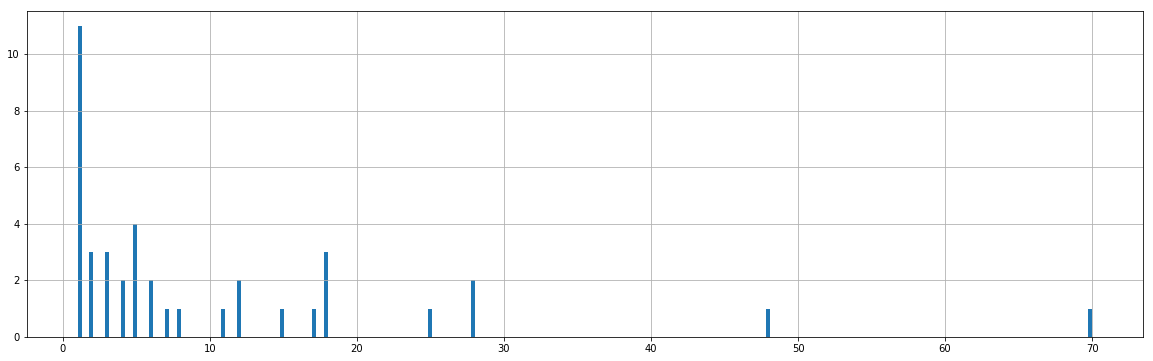

In [58]:
distribution(xor(C1, 122))

In [62]:
as_string( xor(C1, 112) )

"?rxrx]ytge>77rryyc7evrnoc9rv`\x7fx7srvP977dy\x7fu~~7cP977rrre\x7fp\x7frdY\x7fpocccr~0zr#~7dqv~\x7f;ycd~7a7p77rx97r~c\x7frcx\x7f\x7fs|d7s\x7fs|dt7a7cpd~7P7y]y\x7fUcc77{reyvbc7p77vreyz\x7fu~rrb77dr~y7]y~r7dxc7p,rvxn7cdcc7p97ry`77re7p;\x7fpr{\x7fcrey7dxpxx7cc7e9'bv\x7fpc7e7dv7ep\x7f;\x7f`{sy7tyr~`yrv9&a77d`{syvy\x7f7yr{77dxvrr77cx{`7{a7zyvrr\x7f;rv7r~cxrzt{rxP9$\x7f7rre7~~y7gdvuceb~7x\x7fvgdye{;\x7f7uctrqzx&Dc7euv7z7s~sr77e7x79rvq{qy~y{ryqcbr9y`\x7frr7d{nc7x77ry7yq\x7fQ\x7f9"

In [66]:
for i in range(98, 98+26):
    print('Index: {}, String: {}\r\n'.format(i, as_string( xor(C3,i) ) ))

Index: 98, String: nAv&&n&gc77hndoo&ci&tbcubNq&rA*hnq&b4cgor&ahao&b5ctr&crhrto&rhcu&gnbh&m&Jcrjq&&kg&ojcouoripc3njnuh&tar&tc*hr&tc&hct~ho&(&bc&nr&vu1ic&ci&i&corin&ci&a&jpdgc`orri(&nnu`gh&cornq&jgoc&&cor?ni&iunrcorq&p&a&&ci*gahrech&cib7D&rs&cibgkcns&kr&t&brca|n&cnec7Chhoi&hg&i&uqvv*cgh&er(4srg&iccbog&er&knacntnrdi&ot&&b7Rtti'n&&r&e&t&urat&k&uiivhruct&k&iA(&&ci&ecshhjcnchgnkauNq&jisgo&pg&o`huG&&puhoat&cj`niiir&rt

Index: 99, String: o@w''o'fb66ioenn'bh'ucbtcOp's@+iop'c5bfns'`i`n'c4bus'bsisun'sibt'foci'l'Kbskp''jf'nkbntnshq~b2okoti'u`s'ub+is'ub'ibuin')'cb'os'wt0hb'bh'h'bnsho'bh'`'kqefbanssh)'ootafi'bnsop'kfnb''bns>oh'htosbnsp'q'`''bh+f`isdbi'bhc6E'sr'bhcfjbor'js'u'csb`}o'bodb6Biinh'if'h'tpww+bfi'ds)5rsf'hbbcnf'ds'jo`bouoseh'nu''c6S~uuh&o''s'~d'u'ts`u'j'thhwistbu'j'h@)''bh'dbriikbobifoj`tOp'khrfn'qf'naitF''qtin`u'bk~aoh~hhs'su

Index: 100, String: hGp  h ae11nhbii eo rdesdHw tG,nhw d2eait gngi d3ert etntri tnes ahdn k Letlw  ma ileisitovye5hlhsn rgt re,nt re nerxni . de ht ps7oe eo o

First is 103, second is 111, last is 100.

In [73]:
for C, k in [(C1, 103),(C2, 111),(C3, 100)]: print(as_string(xor(C, k)) + '\r\n')

(eoeoJncpr)  eennt raeyxt.eawho deaG.  snhbii tG.  eeerhghesNhgxtttei'me4i sfaih,ntsi v g  eo. eithetohhdks dhdksc v tgsi G nJnhBtt  lernaut g  aernmhbieeu  sein Jnie sot g;eaoy tstt g. enw  er g,hgelhtern sogoo tt r.0uahgt r sa rgh,hwldn cneiwnea.1v  swldnanh nel  soaee  tolw lv mnaeeh,ea eitoemcleoG.3h eer iin psabtrui ohapsnrl,h btcefmo1St rba m dide  r o .eaflfninlenftue.nwhee slyt o  en nfhFh.

T slfo,ht  It gnghWdla ie  si da  so Hw  eennwho Hcadvyi e .oi ish  dta. fie sni dh fgelhtern T g ishu eansa eansaneeiuht6osto eai ttlvyebthlhsttvyeitee csoh smy8o mlw thlh  sn wnsohlh T ehit ulh oisitovyew i  miohwl  tlohhwlw dtohi eodi'roi mh  m  eih na dmgio oehw tcpd1B  lhbieh dcpdi  vt g  cehdnfo  ea bnTssoahilihelnfmunai  a irihosr d4ohWdemhaa v roetanu  su  flgo dahls dea eh o,hgrot lS  eae

hGp  h ae11nhbii eo rdesdHw tG,nhw d2eait gngi d3ert etntri tnes ahdn k Letlw  ma ileisitovye5hlhsn rgt re,nt re nerxni . de ht ps7oe eo o eitoh eo g lvbaefitto. hhsfan eithw laie  eit9ho oshteit

In [75]:
len(C1)

401

In [76]:
len(C2)

400

In [78]:
len(C3)

400

In [79]:
P1 = xor(C1, 103)
P2 = xor(C2, 111)
P3 = xor(C3, 100)

In [90]:
plain = ''.join(['{}{}{}'.format(chr(P1[x]), chr(P2[x]), chr(P3[x])) for x in range(400)]) + chr(P1[400])

In [91]:
plain

"(The Gospel of John, chapter 1) 1 In the beginning the Word already existed. He was with God, and he was God. 2 He was in the beginning with God. 3 He created everything there is. Nothing exists that he didn't make. 4 Life itself was in him, and this life gives light to everyone. 5 The light shines through the darkness, and the darkness can never extinguish it. 6 God sent John the Baptist 7 to tell everyone about the light so that everyone might believe because of his testimony. 8 John himself was not the light; he was only a witness to the light. 9 The one who is the true light, who gives light to everyone, was going to come into the world. 10 But although the world was made through him, the world didn't recognize him when he came. 11 Even in his own land and among his own people, he was not accepted. 12 But to all who believed him and accepted him, he gave the right to become children of God. 13 They are reborn! This is not a physical birth resulting from human passion or plan, this

In [95]:
sum([ ord(x) for x in plain ])

107359

In [97]:
x1 = [ord(p) for p in plain[0:3]]

In [98]:
x1

[40, 84, 104]

In [99]:
cipher[0:3]

[79, 59, 12]

In [100]:
40^79

103

In [101]:
84^59

111

In [102]:
104^12

100